<h1> Gradient Descent

[cs229_code_example](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://cs229.stanford.edu/notes-spring2019/Gradient_Descent_Viz.pdf)

In [114]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

<h2> Load Dataset

In [5]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
pass

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [35]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
# standard sclaer
from sklearn.preprocessing import StandardScaler
def std_scaler(X_train,X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scale=scaler.transform(X_train)
  X_test_scale=scaler.transform(X_test)
  # add a column of 1 for X
  X_train_scale=np.append(np.ones(shape=(X_train.shape[0],1)),X_train_scale,axis=1)
  X_test_scale=np.append(np.ones(shape=(X_test.shape[0],1)),X_test_scale,axis=1)
  return X_train_scale, X_test_scale

X_train,X_test=std_scaler(X_train,X_test)

<h2> Gradient Descent


* Cost Function = MSE/2 = 1/2m * (X * Theta_T - y) ^ 2
*   theta = theta - alpha * gradient
*   gradient = (1/m) * X_T * (X * Theta_T - y)

display the cost function value per iteration



In [294]:
def cost_function(X,theta,y):
  y_pred=np.matmul(X,theta.T)
  error=y_pred-y
  cost = np.dot(error.T, error)
  return cost,error

In [295]:
def gradient_descent(X, y, theta_init, alpha, iters):
  cost_array={}
  theta=theta_init
  m=y.size
  for i in range(iters):
    cost,error=cost_function(X,theta,y)
    gradient = (1/m)* np.dot(X.T,error)
    theta=theta-alpha * gradient
    cost_array[i]=cost
  return theta, cost_array

In [332]:
 # Set hyperparameters
alpha = 0.01
iterations = 1500

# Initialize Theta Values to 0
theta_init = np.zeros(X_train.shape[1])

In [333]:
# Run Gradient Descent
theta, cost_num = gradient_descent(X_train, y_train, theta_init, alpha, iterations)

Text(0, 0.5, 'cost')

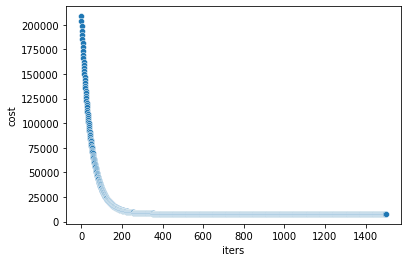

In [334]:
iters=cost_num.keys()
cost=cost_num.values()
fig=sns.scatterplot(x=iters,y=cost)
fig.set_xlabel('iters')
fig.set_ylabel('cost')

In [335]:
def plot_pred_actual(theta,X_test,y_test):
  num_of_pt=y_test.size
  y_test_pred=np.matmul(X_test,theta.T)
  fig=sns.scatterplot(x=y_test_pred,y=y_test)
  xpoints = ypoints = plt.xlim()
  plt.plot(xpoints, ypoints, linestyle='--', color='k')
  fig.set_xlabel('y_pred')
  fig.set_ylabel('y_actual')
  mse=mean_squared_error(y_test,y_test_pred)
  print(f'The num of Point = {num_of_pt}')
  print(f'The MSE = {mse}')
  print(f'theta = {theta}')

The num of Point = 167
The MSE = 21.212593527858754
theta = [22.97078994 -0.89896908  0.70548668  0.16523367  0.9016042  -1.6610473
  2.87924773 -0.40288791 -2.85702434  1.35486165 -0.69751912 -2.02123566
  1.03976133 -3.92085719]


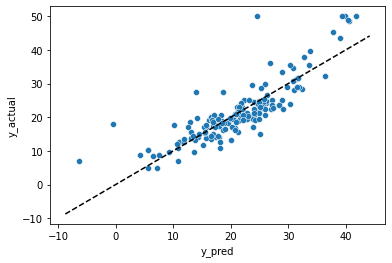

In [336]:
plot_pred_actual(theta,X_test,y_test)

The num of Point = 339
The MSE = 23.06309127652922
theta = [22.97078994 -0.89896908  0.70548668  0.16523367  0.9016042  -1.6610473
  2.87924773 -0.40288791 -2.85702434  1.35486165 -0.69751912 -2.02123566
  1.03976133 -3.92085719]


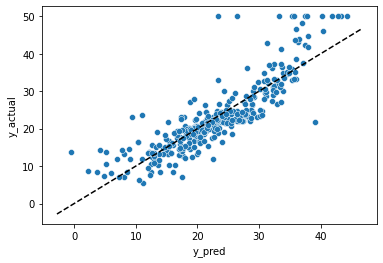

In [337]:
plot_pred_actual(theta,X_train,y_train)

<h2> Compare to existing package

In [338]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
regr_pred = regr.predict(X_test)
regr_mse=mean_squared_error(y_test, regr_pred)

print(regr_mse)

20.7240234373398
